In [4]:
from google.colab import files
uploaded = files.upload()

Saving fer-2013.zip to fer-2013.zip
Saving sentiment140.zip to sentiment140.zip


In [8]:
import zipfile
import os

zip_path = "/content/fer-2013.zip"  # Change this to your uploaded file's name
extract_path = "/content/fer-2013"  # Change this to your desired directory

# Create the directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)


In [6]:
import zipfile
import os

zip_path = "/content/sentiment140.zip"  # Change this to your uploaded file's name
extract_path = "/content/sentiment140"  # Change this to your desired directory

# Create the directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)


In [9]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Extraction complete! Files are in: {extract_path}")


Extraction complete! Files are in: /content/fer-2013


In [10]:
import pandas as pd

# Load Sentiment140 CSV file
file_path = '/content/sentiment140/training.1600000.processed.noemoticon.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1', header=None)

# The dataset contaings columns:
# 0 - sentiment label (0 for negative, 4 for positive)
#

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
import re

# Load Sentiment140 CSV file
file_path = '/content/sentiment140/training.1600000.processed.noemoticon.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1', header=None)

# Add proper column names
data.columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']

# Clean the tweet text
def clean_text(text):
  # Remove URLS, mentions (@user), and extra spaces
  text = re.sub(r'http\S+|www\S+|https\S+', '', text)   # Remove URLS
  text = re.sub(r'@\w', '', text)   # Remove mentions (@user)
  text = re.sub(r'\s', ' ', text)   # Remove extra spaces
  return text

# Apply cleaning function
data['text'] = data['text'].apply(clean_text)

# Now, the dataset is cleaned, and you can split it into training and testing sets
X = data['text']
y = data['sentiment']

# Split into train and tests sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the first few rows of the cleaned data
print(data.head())

# Check the shape of the datasets
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")




   sentiment          id                          date     query  \
0          0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1          0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2          0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3          0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4          0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  witchfoot  - A that's a bummer.  You shoulda g...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  enichan I dived many times for the ball. Manag...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  ationwideclass no, it's not behaving at all. i...  
Training data shape: (1280000,)
Test data shape: (320000,)


In [12]:
import os
import numpy as np
import cv2

# Path to the extracted FER-2013 dataset
dataset_folder = '/content/fer-2013'

# Paths to the train and test folders
train_folder = os.path.join(dataset_folder, 'train')
test_folder = os.path.join(dataset_folder, 'test')

# Initialize lists for image data and labels
train_images = []
train_labels = []
test_images = []
test_labels = []

# Define the emotion labels
emotion_labels = {
    0: 'angry',
    1: 'disgust',
    2: 'fear',
    3: 'happy',
    4: 'sad',
    5: 'neutral',
    6: 'surprise'
}

def load_images_from_folder(folder, label):
  # Initialize lists for image data and labels
  images = []
  labels = []

  # Loop through the images in each emotion folder
  for filename in os.listdir(folder):
    img_path = os.path.join(folder, filename)
    if filename.endswith('.jpg'): # Only load .jpg images
      img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
      if img is not None:
        # Resize image to 48x48 pixels (standard for FER-2013)
        img = cv2.resize(img, (48, 48))
        images.append(img)
        labels.append(label)
  return images, labels

# Load images for each emotion category (train)
for label in range(7):  # There are 7 emotion labels in FER-2013
  emotion_folder = os.path.join(train_folder, emotion_labels[label])
  images, labels = load_images_from_folder(emotion_folder, label)
  train_images.extend(images)
  train_labels.extend(labels)

# Load images for each emotion category (test)
for label in range(7):  # There are 7 emotion labels in FER-2013
  emotion_folder = os.path.join(test_folder, emotion_labels[label])
  images, labels = load_images_from_folder(emotion_folder, label)
  test_images.extend(images)
  test_labels.extend(labels)

# Convert lists to numpy arrays
X_train = np.array(train_images)
y_train = np.array(train_labels)
X_test = np.array(test_images)
y_test = np.array(test_labels)

# Normalize image data to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape images to include a single channel for grayscale (48x48x1)
X_train = X_train.reshape(-1, 48, 48, 1)
X_test = X_test.reshape(-1, 48, 48, 1)

# Verify the data shape
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")


Training data shape: (28709, 48, 48, 1)
Test data shape: (7178, 48, 48, 1)
Training labels shape: (28709,)
Test labels shape: (7178,)


In [1]:
import tensorflow as tf
import torch
import platform

# Check TensorFlow version and GPU availability
print(f"TensorFlow version: {tf.__version__}")
tf_gpus = tf.config.list_physical_devices('GPU')
if tf_gpus:
    print(f"Is GPU available for TensorFlow? {tf_gpus}")
else:
    print("No GPU found for TensorFlow.")

# Check PyTorch version and GPU availability
print(f"PyTorch version: {torch.__version__}")
if torch.cuda.is_available():
    print("Is GPU available for PyTorch? True")
    print(f"GPU count: {torch.cuda.device_count()}")
    print(f"Current GPU: {torch.cuda.current_device()} - {torch.cuda.get_device_name(torch.cuda.current_device())}")
else:
    print("No GPU found for PyTorch.")

# Check Python version
print(f"Python version: {platform.python_version()}")


TensorFlow version: 2.18.0
Is GPU available for TensorFlow? [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
PyTorch version: 2.5.1+cu124
Is GPU available for PyTorch? True
GPU count: 1
Current GPU: 0 - Tesla T4
Python version: 3.11.11


In [25]:
import pandas as pd

# Load dataset
file_path = "/content/sentiment140/training.1600000.processed.noemoticon.csv"
columns = ["sentiment", "id", "date", "query", "user", "text"]
df = pd.read_csv(file_path, encoding="ISO-8859-1", names=columns)

# Convert sentiment labels to readable format
sentiment_mapping = {0: "Negative", 2: "Neutral", 4: "Positive"}
df["sentiment"] = df["sentiment"].map(sentiment_mapping)

# Display sample tweets
num_samples = 10  # Number of tweets to display
sampled_tweets = df.sample(num_samples, random_state=42)[["sentiment", "text"]]

# Print results
print(sampled_tweets.to_string(index=False))


sentiment                                                                                                                                      text
 Negative                                                                                                    @chrishasboobs AHHH I HOPE YOUR OK!!! 
 Negative                                                                                 @misstoriblack cool , i have no tweet apps  for my razr 2
 Negative @TiannaChaos i know  just family drama. its lame.hey next time u hang out with kim n u guys like have a sleepover or whatever, ill call u
 Negative                                               School email won't open  and I have geography stuff on there to revise! *Stupid School* :'(
 Negative                                                                                                                    upper airways problem 
 Negative                                                                                                Going t

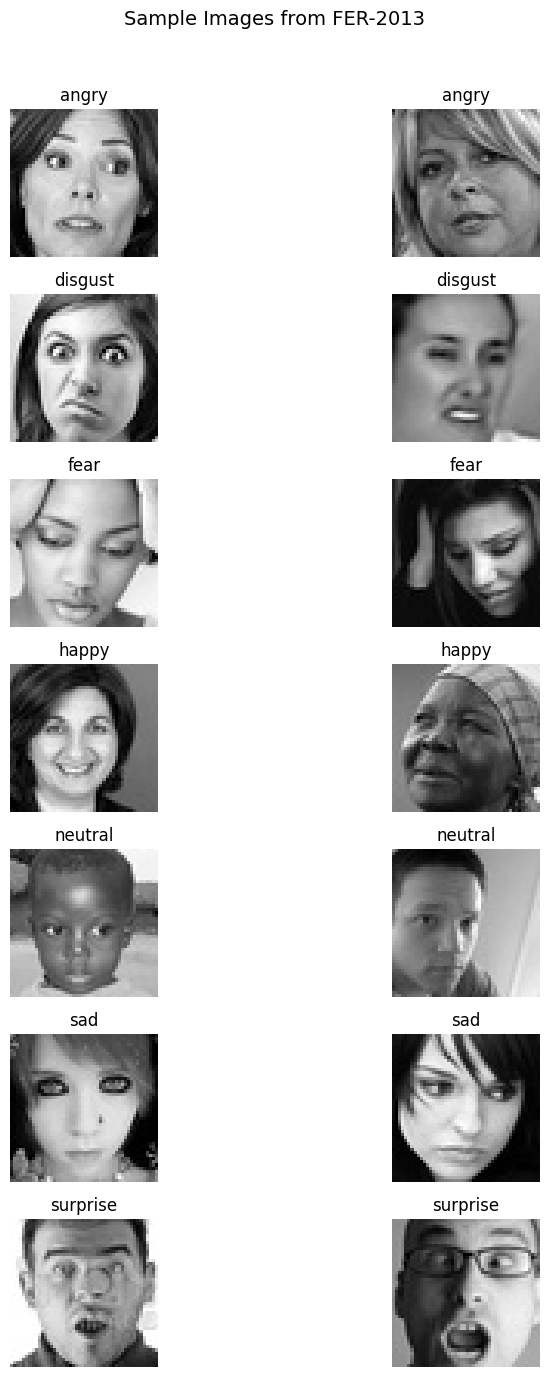

In [29]:
import os
import random
import matplotlib.pyplot as plt
import cv2

# Define dataset path
dataset_path = "/content/fer-2013"  # Update this path if needed

# Define emotions (folder names should match)
emotions = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

# Function to load and display sample images
def visualize_fer_images(dataset_path, num_samples=2):
    fig, axes = plt.subplots(len(emotions), num_samples, figsize=(10, 14))
    fig.suptitle("Sample Images from FER-2013", fontsize=14)

    for i, emotion in enumerate(emotions):
        emotion_path = os.path.join(dataset_path, "train", emotion)  # Change to "test" if needed
        image_files = os.listdir(emotion_path)

        # Select random images
        selected_images = random.sample(image_files, min(num_samples, len(image_files)))

        for j, img_name in enumerate(selected_images):
            img_path = os.path.join(emotion_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            if img is not None:
                axes[i, j].imshow(img, cmap="gray")
                axes[i, j].set_title(emotion)
                axes[i, j].axis("off")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Run visualization
visualize_fer_images(dataset_path)
